In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [600]:
iris = pd.read_csv("iris.data", header=None)
iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]
print(iris['Class'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64


In [601]:
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Class          0
dtype: int64

In [602]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [603]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

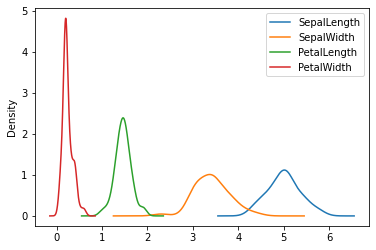

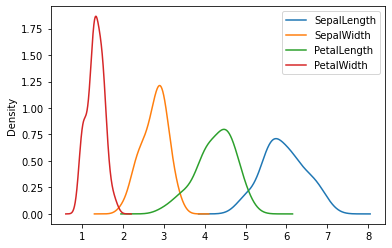

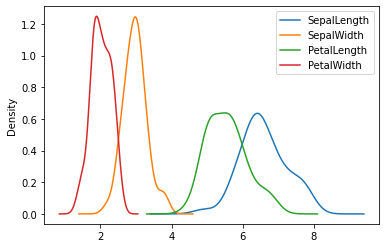

In [604]:
iris.groupby('Class').plot(kind='kde')

<AxesSubplot:xlabel='SepalLength', ylabel='Probability'>

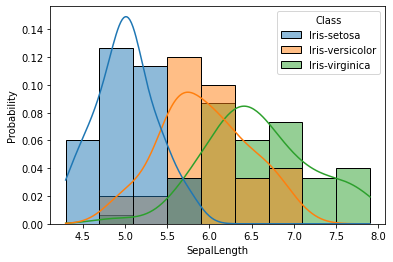

In [605]:
sns.histplot(data=iris, x='SepalLength', hue='Class', alpha=0.5, kde=True, stat='probability')

<AxesSubplot:>

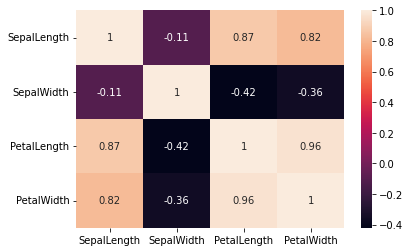

In [606]:
sns.heatmap(iris.corr(), annot=True)

In [607]:
from sklearn.preprocessing import LabelEncoder

iris['Class'] = LabelEncoder().fit_transform(iris['Class'])
iris['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [608]:
from sklearn.preprocessing import MinMaxScaler
normalized_iris = MinMaxScaler().fit_transform(iris.drop(columns=['Class']))
normalized_iris = pd.DataFrame(normalized_iris)
normalized_iris['Class'] = iris['Class']
normalized_iris.columns = iris.columns
normalized_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [609]:
normalized_iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,1.000000
std,0.230018,0.180664,0.299054,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


In [610]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_iris.drop('Class', axis=1), normalized_iris['Class'], test_size=0.2, random_state=42)

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [611]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
selector.fit(x_train, y_train)
best_features = selector.get_feature_names_out()
x_train[best_features].head()

,PetalLength,PetalWidth
0,0.000000,0.041667
1,0.084746,0.125000
2,0.576271,0.541667
3,0.101695,0.041667
4,0.050847,0.041667


In [612]:
selected_x_train = x_train[best_features]
selected_x_test = x_test[best_features]

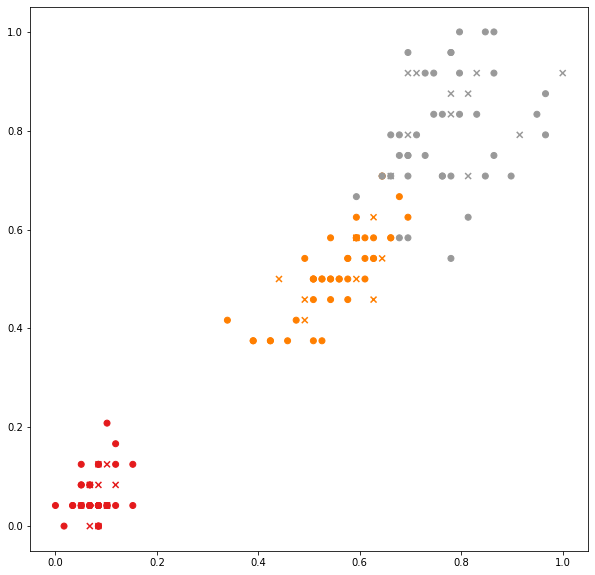

In [613]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis', metric_params={'V': np.cov(selected_x_train.T)})
knn.fit(selected_x_train, y_train)
predict = knn.predict(selected_x_test)

plt.figure(figsize=(10, 10))
plt.scatter(selected_x_train['PetalLength'], selected_x_train['PetalWidth'], c=y_train, cmap='Set1')
plt.scatter(selected_x_test['PetalLength'], selected_x_test['PetalWidth'], c=predict, marker='x', cmap='Set1')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



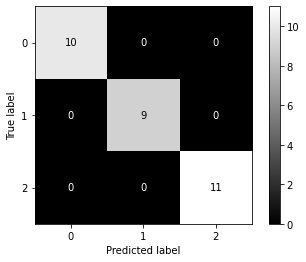

In [614]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

cm = confusion_matrix(y_test, predict)
ConfusionMatrixDisplay(cm).plot(cmap='gray')
print(classification_report(y_test, predict))

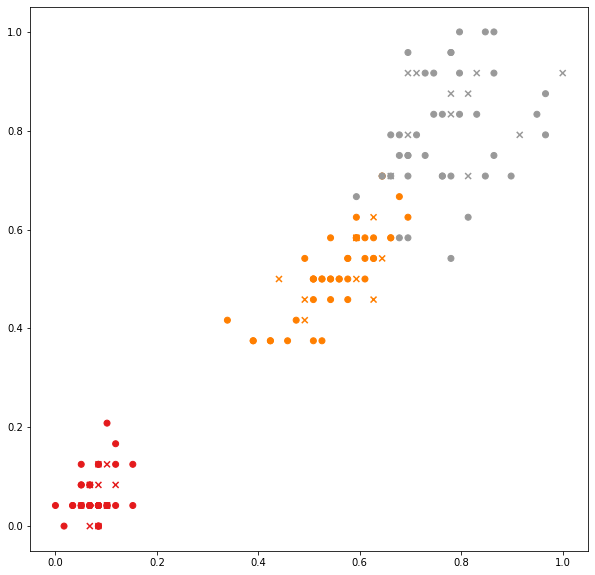

In [615]:
from sklearn.neighbors import NearestCentroid

nc = NearestCentroid()

nc.fit(selected_x_train, y_train)
predict = nc.predict(selected_x_test)

plt.figure(figsize=(10, 10))
plt.scatter(selected_x_train['PetalLength'], selected_x_train['PetalWidth'], c=y_train, cmap='Set1')
plt.scatter(selected_x_test['PetalLength'], selected_x_test['PetalWidth'], c=predict, marker='x', cmap='Set1')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



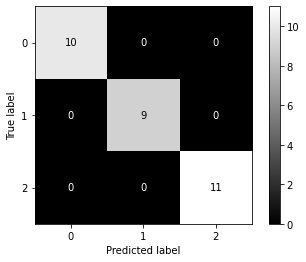

In [616]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

cm = confusion_matrix(y_test, predict)
ConfusionMatrixDisplay(cm).plot(cmap='gray')
print(classification_report(y_test, predict))

# Wnioski

Uzyskane wyniki wskazują na to, że klasyfikacja za pomocą klasy NearestCentroid jest bardzo dobra.
Wyniki klasyfikacji KNN z pomoca metryki mahalanobisa wskazują na to, że klasyfikacja za pomocą klasyfikatora KNN jest bardzo dobra.

Klasyfikator kNN uzywajacy mahalanobisa okazal sie bardziej skutecznym, niz klasyfikator kNN uzywajacy metryki euklidesowej oraz klasyfikator NearestCentroid.
